Q1. Daily gridded rainfall data for India is available at
https://www.imdpune.gov.in/Clim_Pred_LRF_New/Grided_Data_Download.html#
a. Download rainfall data at 0.25-degree resolution from 2010- 2020 and read them using an
appropriate library.
b. Write a code to create a time series of annual, monsoon (JJAS) and daily annual maximum
rainfall for a given grid point and plot it against time (3 plots).
c. Estimate mean, standard deviation and coefficient of variation for annual, monsoon and
daily maximum rainfall. Use try… except to handle any exceptions.
d. Next, using multiprocessing package repeat (b) and (c) for all the grid points over India. Is
parallel programming a good option for this application?
e. Make spatial plots (contours) to show mean, standard deviation and coefficient of variation
for annual, monsoon and daily annual maximum rainfall (9 plots).


In [86]:
data=xr.open_mfdataset('*.nc',combine='by_coords')

In [87]:
rainfall=data["RAINFALL"]
rainfall

<xarray.DataArray 'RAINFALL' (TIME: 4018, LATITUDE: 129, LONGITUDE: 135)> Size: 560MB
dask.array<concatenate, shape=(4018, 129, 135), dtype=float64, chunksize=(366, 129, 135), chunktype=numpy.ndarray>
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 1kB 66.5 66.75 67.0 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 1kB 6.5 6.75 7.0 7.25 ... 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 32kB 2010-01-01 2010-01-02 ... 2020-12-31
Attributes:
    long_name:  Rainfall
    units:      mm
    history:    From ind2010_rfp25.grd

In [100]:
#Targeted grid point data(KANPUR)
lat=26.5
lon=80
rainfall=data["RAINFALL"].sel(LATITUDE= lat,LONGITUDE=lon,method="nearest")

# changing date to pandas format
import pandas as pd
rainfall["TIME"]=pd.to_datetime(rainfall["TIME"])

# Creating time series of annual, monsoon (JJAS) and daily annual maximum rainfall
annual_rain=rainfall.groupby(rainfall.TIME.dt.year).sum().values
print("The annual rain in KANPUR in 11 yrs \n   : ",annual_rain)

monsoon_rain=rainfall.sel(TIME=rainfall.TIME.dt.month.isin([6,7,8,9]))
monsoon_rainfall=monsoon_rain.groupby(monsoon_rain.TIME.dt.year).sum().values
print("The monsoon rain in KANPUR in 11 yrs \n   : ",monsoon_rainfall)

daily_max=rainfall.groupby(rainfall["TIME"].dt.year).max().values
print("The annual maximum rain in KANPUR in 11 yrs \n    : ",daily_max)



The annual rain in KANPUR in 11 yrs 
   :  [ 955.30631252  590.68256511  684.98806746 1180.0247875   683.71302202
  586.21450002  644.11216699  672.15028979  981.53598416  988.49219213
 1090.95186116]
The monsoon rain in KANPUR in 11 yrs 
   :  [883.34480731 576.47675279 627.35016771 908.09666932 452.85839164
 359.41982538 543.4723379  601.67126566 932.9743308  869.35466002
 867.85086487]
The annual maximum rain in KANPUR in 11 yrs 
    :  [ 69.4665451   77.92761993 124.24762726 111.81222534  57.50959778
  62.926651    51.17370605  97.56303406 145.80332947  84.18087006
 103.78630829]


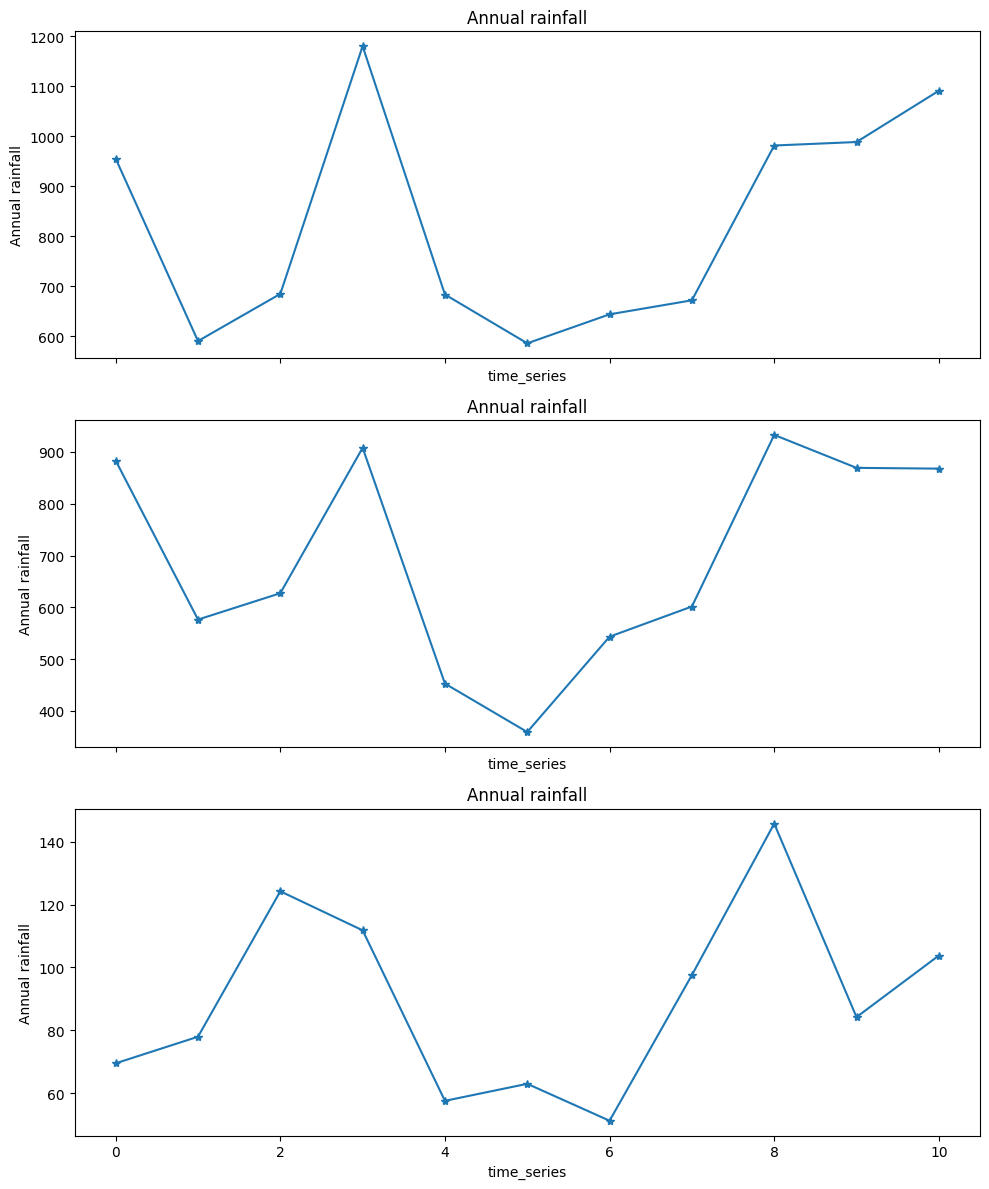

In [89]:
# plotting of graphs
import matplotlib.pyplot as plt
fig,axes= plt.subplots(3,1,figsize=(10,12),sharex=True)

# plotting annual rainfall
axes[0].plot(annual_rain,marker="*")
axes[0].set_title("Annual rainfall")
axes[0].set_ylabel("Annual rainfall")
axes[0].set_xlabel("time_series")

# plotting MONSOON rainfall
axes[1].plot(monsoon_rainfall,marker="*")
axes[1].set_title("Annual rainfall")
axes[1].set_ylabel("Annual rainfall")
axes[1].set_xlabel("time_series")


# plotting daily max rainfall
axes[2].plot(daily_max,marker="*")
axes[2].set_title("Annual rainfall")
axes[2].set_ylabel("Annual rainfall")
axes[2].set_xlabel("time_series")
plt.tight_layout()

In [90]:
# c. Estimate mean, standard deviation and coefficient of variation for annual, monsoon and
#daily maximum rainfall. Use try… except to handle any exceptions.
import numpy as np
try:
    annual_mean=annual_rain.mean()
    annual_std_dev=annual_rain.std()
    annual_COV=annual_std_dev/annual_mean

    print("annual_mean : ",annual_mean)
    print("annual_std_dev : ",annual_std_dev)
    print("annual_COV  : ",annual_COV)


    monsoon_mean=monsoon_rainfall.mean()
    monsoon_std_dev=monsoon_rainfall.std()
    monsoon_COV=monsoon_std_dev/ monsoon_mean

    print("monsoon_mean : ",monsoon_mean)
    print("monsoon_std_dev : ",monsoon_std_dev)
    print("monsoon_COV : ",monsoon_COV)

    dailymax_mean=daily_max.mean()
    dailymax_std_dev=daily_max.std()
    dailymax_COV=dailymax_std_dev/dailymax_mean

    print("dailymax_mean: ",dailymax_mean)
    print("dailymax_std_dev : ",dailymax_std_dev)
    print("dailymax_COV : ", dailymax_COV)

except Exception as e:
    print(f"An error occurred: {e}")

annual_mean :  823.4701589874246
annual_std_dev :  207.26183762372182
annual_COV  :  0.25169319781858296
monsoon_mean :  692.9881884902716
monsoon_std_dev :  195.23644029801736
monsoon_COV :  0.28173126691142464
dailymax_mean:  89.67250130393289
dailymax_std_dev :  28.454217878207015
dailymax_COV :  0.31731263725727094


In [120]:
#  e)Next, using multiprocessing package repeat (b) and (c) for all the grid points over India. Is
#    parallel programming a good option for this application?

latitudes=data["LATITUDE"].values
longitudes=data["LONGITUDE"].values

lat_min,lat_max=6.5,38.5
lon_min,lon_max=66.5,100

valid_lats=latitudes[(latitudes>=lat_min) & (latitudes<=lat_max)]  # and does not work for large no of element
valid_lons=longitudes[(longitudes>=lon_min) & (longitudes<=lon_max)]

#processing grid points


def processed_grid_points(lat,lon,rainfall):
    rain_grid=rainfall['RAINFALL'].sel(LATITUDE=lat,LONGITUDE=lon,method="nearest")
    rainfall["TIME"]=pd.to_datetime(rainfall["TIME"])
#annual rainfall grouping
    annual_rainfall=rain_grid.groupby(rain_grid.TIME.dt.year).sum()
#monsoon rainfall grouping
    monsoon_rain=rain_grid.sel(TIME=rain_grid.TIME.dt.month.isin([6,7,8,9]))
    monsoon_rainfall=monsoon_rain.groupby(monsoon_rain.TIME.dt.year).sum()
#annual maximimum rainfall grouping
    annual_max_rainfall=rain_grid.groupby(rain_grid.TIME.dt.year).max()
#Calculating annual mean,stdev,cov
    annual_mean=annual_rainfall.mean()
    annual_std_dev=annual_rainfall.std()
    annual_COV=annual_std_dev/annual_mean
#Calculating monsoon mean,stdev,cov
    monsoon_mean=monsoon_rainfall.mean()
    monsoon_std_dev=monsoon_rainfall.std()
    monsoon_COV=monsoon_std_dev/ monsoon_mean
#Calculating annual max mean,stdev,cov
    dailymax_mean=annual_max_rainfall.mean()
    dailymax_std_dev=annual_max_rainfall.std()
    dailymax_COV=dailymax_std_dev/dailymax_mean
    return lat,lon,annual_rainfall.values,monsoon_rainfall.values,annual_max_rainfall.values,annual_mean,annual_std_dev,annual_COV,monsoon_mean,monsoon_std_dev,monsoon_COV,dailymax_mean,dailymax_std_dev,dailymax_COV


In [121]:
processed_grid_points(22,77,data)

(22,
 77,
 array([ 912.04214635, 1123.65141486, 1600.24395078, 1720.88606988,
        1123.41097143, 1058.87925933,  957.09521484,  694.04099786,
         741.36858425, 1413.06852847, 1021.82396307]),
 array([ 866.85493971, 1114.39583905, 1594.73670276, 1613.52968119,
        1052.18478759,  913.84667696,  895.26731642,  660.22517526,
         732.16471878, 1285.48550374,  964.25549103]),
 array([ 72.68629456, 107.0739975 , 106.0852356 , 207.74295044,
        130.85169983, 211.51956177,  87.56465912,  56.49223328,
         78.80361176,  76.41772461, 101.83047485]),
 <xarray.DataArray 'RAINFALL' ()> Size: 8B
 dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     LONGITUDE  float64 8B 77.0
     LATITUDE   float64 8B 22.0,
 <xarray.DataArray 'RAINFALL' ()> Size: 8B
 dask.array<_sqrt, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>
 Coordinates:
     LONGITUDE  float64 8B 77.0
     LATITUDE   float64 8B 22.0,
 <xar

In [5]:

import multiprocessing
from multiprocessing import Pool
grid_points=[(lat,lon,rain) for lat in valid_lats for lon in valid_lons]
def parallel_processing():
    num_processes = multiprocessing.cpu_count()

    with Pool(num_processes) as pool:
        # Use starmap to apply process_item to each set of arguments
        results = pool.starmap(process_item,grid_points)

    return results


results = parallel_processing()
print(results)


'\nimport multiprocessing\nfrom multiprocessing import Pool\ngrid_points=[(lat,lon,rain) for lat in valid_lats for lon in valid_lons]\ndef parallel_processing():\n    num_processes = multiprocessing.cpu_count()\n\n    with Pool(num_processes) as pool:\n        # Use starmap to apply process_item to each set of arguments\n        results = pool.starmap(process_item,grid_points)\n\n    return results\n\n\nresults = parallel_processing()\nprint(results)\n'